## Analyse du difractogramme du DyCuSe2 pour un rayonnement CuKa de 1.54060 A°
Attention à bien télécharger le fichier XRay.PNG pour avoir l'image intégrée au notebook.

In [2]:
from pymatgen.ext.matproj import MPRester #Cette cellule permet de télécharger les modules utilsier pour télécharger le fichier
from pymatgen.io.cif import CifWriter     #CIF, avec MPRester qui permet d'accéder à la base de donnée de Material Project (MP)
from pymatgen import Structure            # et CifWriter qui contient les fonctions pour créer un fichier CIF
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.analysis.diffraction.xrd import XRDCalculator

In [3]:
with MPRester("GZeryMtA91usB78Q") as m:                     #Cette cellule utilise ma clé personnelle pour accéder à la base de 
    structure = m.get_structure_by_material_id("mp-675349") #données , la fonction get_ ... permet d'obtenir la structure donnée
                                                            #sur MP

In [4]:
writer = CifWriter(structure) #N'ayant pas trouvé de fonction téléchargeant directement le fichier CIF depuis MP je
writer.write_file("mp-675349_download.cif")# prends la structure et je crée un fichier CIF avec CifWriter à partir de celle-ci
                                           # le paramètre symprec permet de calculer les opérations de symétrie

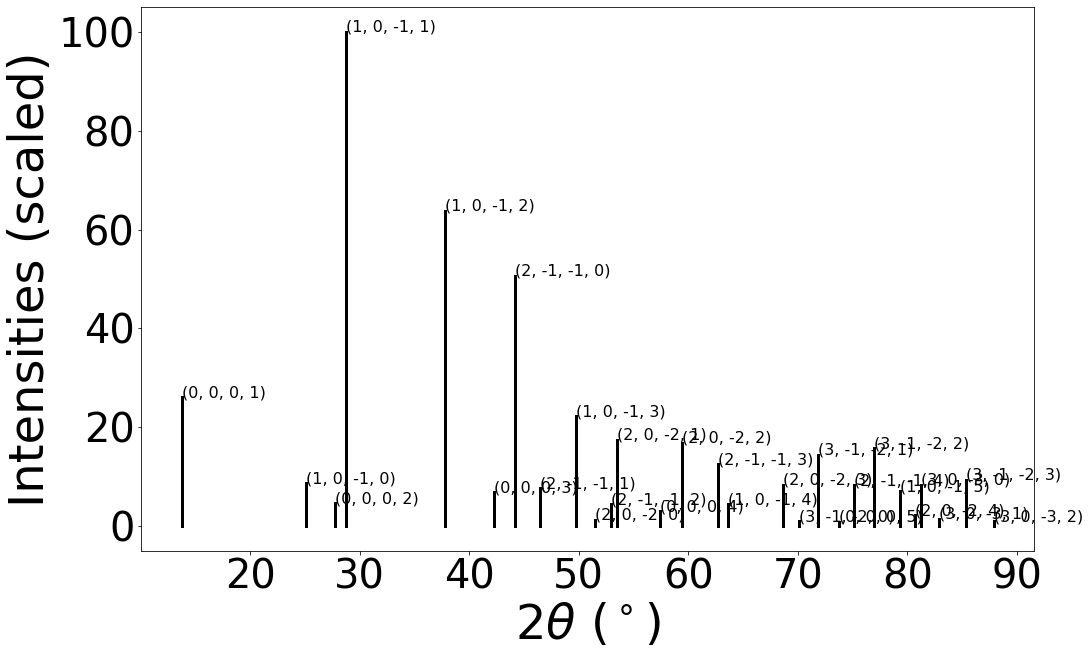

In [16]:
calculator = XRDCalculator(1.54060 ,symprec= 0.1)
# Créer les calculs qui permettent d'obtenir les pics en fonction de la longueur demandée (ici CuKa avec lambda = 1.54060 A° )
pics = calculator.get_pattern(structure)
#permet d'obtenir les pics pour ma structure
diagramme = calculator.get_plot(structure, annotate_peaks = True)
#Permet d'avoir le plot du diagramme avec les valeurs à coté des pics
indices = pics.hkls
#permet de stocker les indices des plans de diffraction (h,k,l) ainsi que leur multiplicité
distance = pics.d_hkls
#permet de stocker la distance inter planaire
angles = pics.x 
#permet de stocker les angles de diffractions
intensite = pics.y
#permet de stocker les intensités des pics

Ci dessus l'on peut voir le graphe des pics de diffractions on peut remarquer que les 3 premiers se toruvent en (0,0,0),(1,0,-1),
(2,-1,-1). Les 4ème nombre de chaque parenthèse représente la multiplicité de chacun des pics, les 3 premiers sont les paramètres 
(h,k,l) du plan de diffraction. Ce plan est le plan du réseau direct associé au point du réseau réciproque pour lequel il y a diffraction. Ce graphe est donné en intensité relative, c'est à dire sur une échelle de 0 à 100 représentant le pourcentgae d'intensité par rapport au pic le plus intense, donc le quatrième pic dans ce cas ci. 

Dans le cas de ce matériaux on est dans le cas d'un réseau hexagonal primitif et donc il n'y a pas de conditions pour la présence des pics. Cette condition vient de la contribution du facteur de structure, qui est nul pour certains points du réseau réciproque à cause d'interférence entre les ondes diffusées par les atomes. Ce qui n'est pas le cas dans un réseau primitif.

On peut remarquer que le graphes montre plusieurs pics pour un même plan hkl, par exemple le plan (0,0,0) a le premier pic, mais aussi le troisième, ect. On va donc s'intéressé aux 3 premiers pics pertients plutôt qu'aux 3 premiers pics montrés par le graphe.

Pour ce faire nous allons indiquer leur plan, la multiplicité de ce plan, la distance interplanaire, l'angle de diffraction ainsi que l'intensité du pic.

# Premier pic :

In [19]:
print('hkl:', indices[0][0]['hkl'][:3])
print('mulpiplicité:', indices[0][0]['hkl'][3])
print('distance:', distance[0])
print('angle:', angles[0])
print('intensité:',intensite[0])

hkl: (0, 0, 0)
mulpiplicité: 1
distance: 6.414456
angle: 13.794377206691621
intensité: 26.107568279769765


# Deuxième pic :

In [20]:
print('hkl:', indices[1][0]['hkl'][:3])
print('mulpiplicité:', indices[1][0]['hkl'][3])
print('distance:', distance[1])
print('angle:', angles[1])
print('intensité:',intensite[1])

hkl: (1, 0, -1)
mulpiplicité: 0
distance: 3.549338324870003
angle: 25.068873958498923
intensité: 8.633898133824923


Ce deuxième pic est donné dans une direction différente du premier, on peut donc s'intéresser à son intensité, est elle relativement faible comme on peut le voir d'abord sur le graphique et ensuite par sa valeur absolue. De plus si l'on regarde le graphe on remarque que le pics pic avec la plus grande intensité possède les mêmes indices hkl, on va donc s'intéresé à ce pics pour cette famille d'indice. Regardons alors le pics suivant.

In [21]:
print('hkl:', indices[2][0]['hkl'][:3])
print('mulpiplicité:', indices[2][0]['hkl'][3])
print('distance:', distance[2])
print('angle:', angles[2])
print('intensité:',intensite[2])

hkl: (0, 0, 0)
mulpiplicité: 2
distance: 3.207228
angle: 27.793886242837946
intensité: 4.618670995621828


Ce pic est donné dans la même famille de plan que le premier on va donc s'intéresser au pic suivant.

In [22]:
print('hkl:', indices[3][0]['hkl'][:3])
print('mulpiplicité:', indices[3][0]['hkl'][3])
print('distance:', distance[3])
print('angle:', angles[3])
print('intensité:',intensite[3])

hkl: (1, 0, -1)
mulpiplicité: 1
distance: 3.1056040248989896
angle: 28.72258539112029
intensité: 100.0


Ce pic se trouve sur une famille de plan différente du premier pic et est le pic avec la plus grande intensité.

# Troisième pic :

In [24]:
print('hkl:', indices[4][0]['hkl'][:3])
print('mulpiplicité:', indices[4][0]['hkl'][3])
print('distance:', distance[4])
print('angle:', angles[4])
print('intensité:',intensite[4])

hkl: (1, 0, -1)
mulpiplicité: 2
distance: 2.3796340911585827
angle: 37.774300330115935
intensité: 63.857316720583384


Ce pic appartient à la même famille que le précédent on s'intéresse donc au suivant.

In [25]:
print('hkl:', indices[5][0]['hkl'][:3])
print('mulpiplicité:', indices[5][0]['hkl'][3])
print('distance:', distance[5])
print('angle:', angles[5])
print('intensité:',intensite[5])

hkl: (0, 0, 0)
mulpiplicité: 3
distance: 2.1381520000000003
angle: 42.23286651157852
intensité: 6.894939342160487


Ce pic appartient à la même famille que le premier on s'intéresse donc au suivant

In [26]:
print('hkl:', indices[6][0]['hkl'][:3])
print('mulpiplicité:', indices[6][0]['hkl'][3])
print('distance:', distance[6])
print('angle:', angles[6])
print('intensité:',intensite[6])

hkl: (2, -1, -1)
mulpiplicité: 0
distance: 2.0492114373087515
angle: 44.159984242901416
intensité: 50.649455339383834


Ce pic appartient à une famille différente des précédents et possède une intensité intéressante.

# Conclusion

On a donc obtenus trois premiers pics pertinents qui sont différent des trois premiers pics présenté  par le graphe. Néanmoins les trois premiers pics donnés par la graphe on été cités à  tritre indicatif, il s'agit du premier pic ainsi que des deux permeirs pics de la section "Deuxième pic".

Pour conclure nous pouvons comparer le graphe obtenu par ce code et celui donné par materials project pour un rayonnement Cu et on peut voir qu'ils sont identiques :

Le graphe du programme :



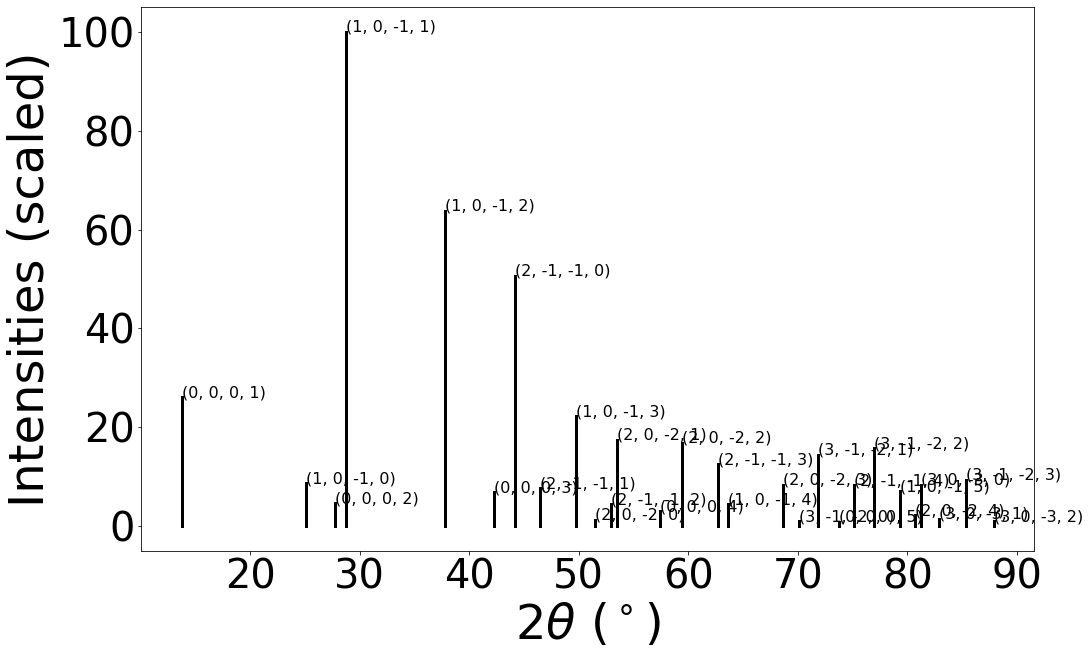

In [39]:
print('Le graphe du programme :\n')
diag2 = calculator.get_plot(structure, annotate_peaks = True)

Le graphe de Materials Project :


![title](XRay.PNG)